# Practical Exercise - Data Analytics

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Dataset reading

In [5]:
df = pd.read_csv('sysarmy_survey_2022_processed.csv')

In [6]:
len(df)

5358

In [7]:
df[:3]


,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis


In [8]:
print(df.columns)

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

# Incomes Analysis

Una primera pregunta que se nos puede ocurrir al ver esta encuenta es: **"¿Y cuánto cobran los programadores en Argentina?"**

Este será nuestro punto de partida para el análisis del conjunto de datos. 
El proceso total constará de varias iteraciones: a medida que se analicen los datos se descrubrirán otros aspectos relevantes, lo cual disparará nuevas preguntas.

Para conocer más sobre la distribución de los salarios, es necesario elegir una columna de la encuesta para analizar.

In [9]:
salary_col = 'salary_monthly_NETO'

Exploremos la base en relación a estos datos. Una buena forma de comenzar una exploración es a través de la visualización. 
Seaborn nos provee un tipo de gráfico específico para graficar columnas que contienen números, llamado `displot`.

El gráfico generado es un **histograma** de frecuencias. En el eje x se grafican los valores que toma la columna, divididos en intervalos o bins. En el eje y se grafica el conteo de ocurrencias de valores en cada intervalo.

c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


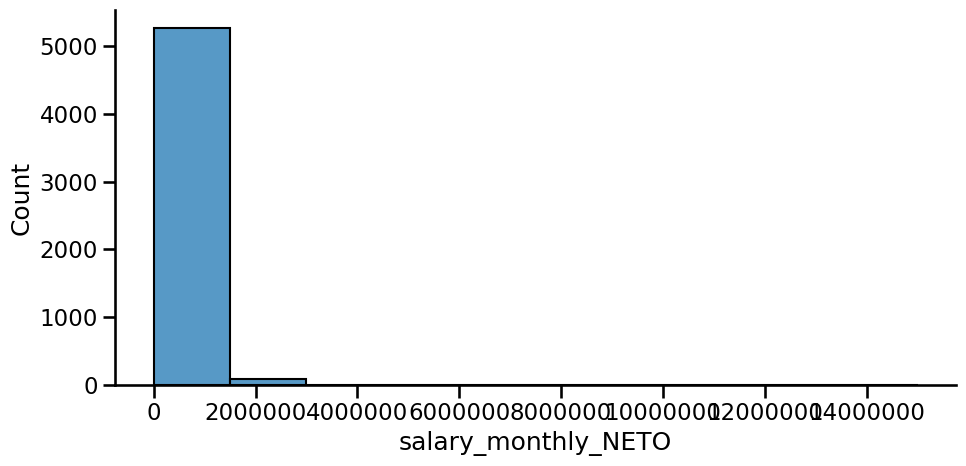

In [22]:
seaborn.displot(df[salary_col],bins= 10, aspect=2)

plt.ticklabel_format(style='plain', axis='x')

### ¿Qué estamos viendo?

Las visualizaciones simples son prácticas para conocer la forma de los datos rápidamente, porque condensan mucha información. Por ejemplo:
* El rango de valores tomados por la columna va desde 0 hasta aproximadamente 2M.
* La mayoría de los valores se condensa por debajo de los 250K, y pocos superan los 500K.
* Los valores más frecuentes aparentan estar cerca de los 100K.
* Hay un pico de ocurrencias en el valor 0.
 y brindan poco detalle.


<Axes: xlabel='count', ylabel='work_province'>

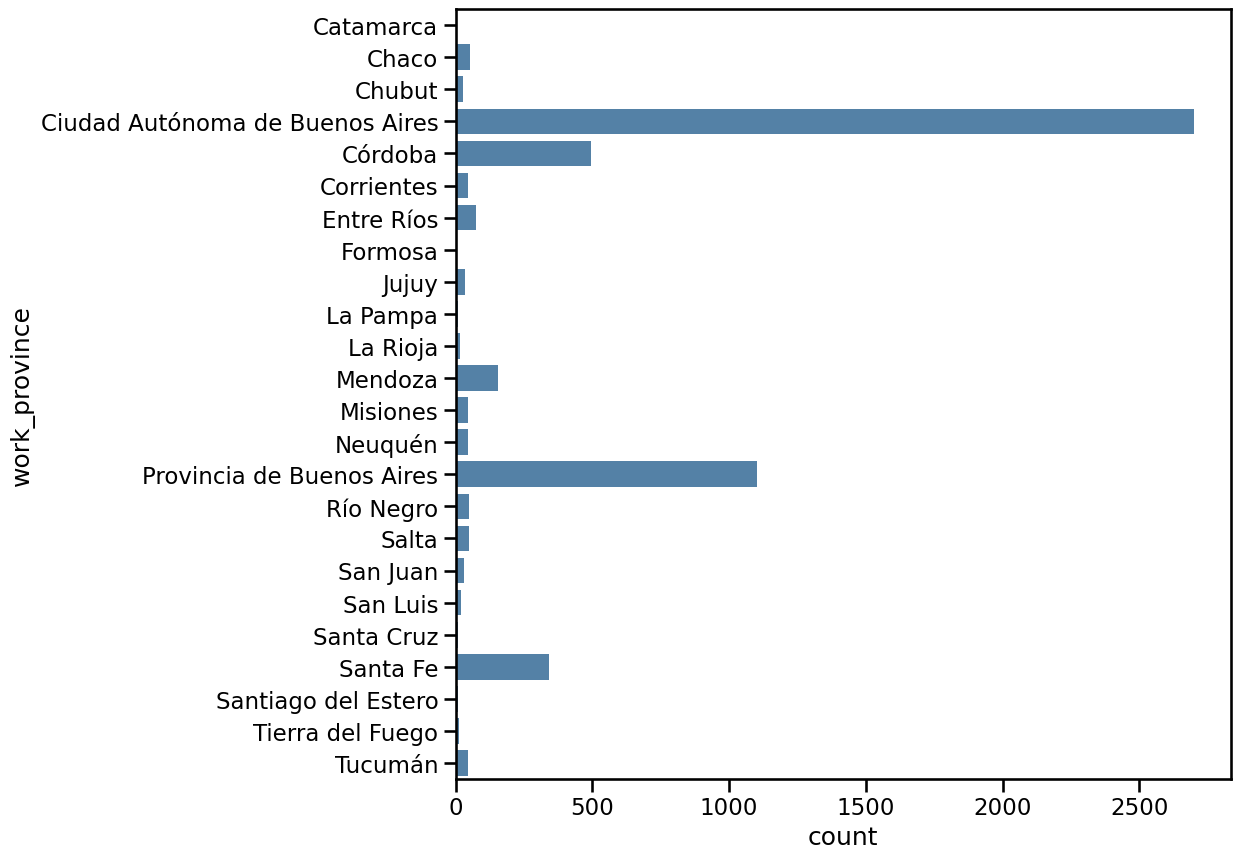

In [25]:
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=df.work_province, color='steelblue')

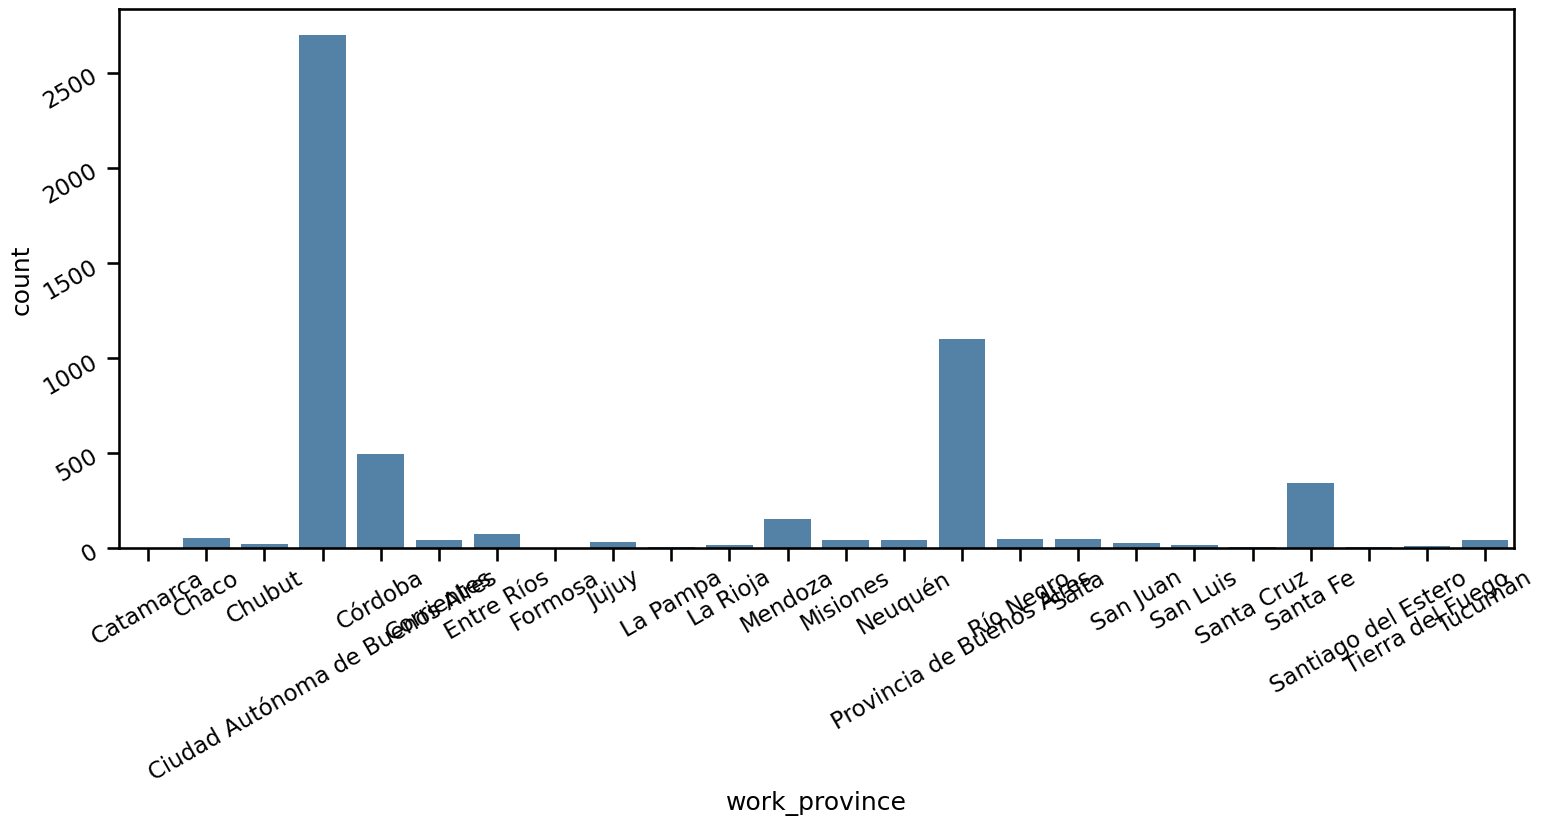

In [26]:
plt.figure(figsize=(18,7))
seaborn.countplot(x=df.work_province, color='steelblue')
plt.tick_params(labelrotation=30)

## Ejercicio: ¿Qué otro tipo de preguntas nos podemos hacer en este punto que no se responden con un histograma?


## Datos y Variables Aleatorias

Podemos considerar que cada columna es un conjunto de datos, que se puede modelar con el concepto matemático de **variable aleatoria**, y que cada dato de esa columna es  una **realización u observación** de dicha variable. 
Habrá datos (o intervalo) más "comunes" o repetidos y datos más atípicos...Ese concepto será modelado como la distribución o densidad de la variable aleatoria. Pero, ¿qué tipo tienen esas variables (o datos)?

### V.A. numéricas, para datos numéricos

El salario, la edad, los años de experiencia, son datos numéricos, serán modelados con variables aleatorias numéricas. Podemos clasificarlas en **continuas** o **discretas**, aunque esa distinción se vuelve difusa cuando trabajamos con datos computacionalmente. ¿Por qué? 

* Datos que en teoría son continuos, se miden de manera discreta. Por ejemplo, los *años* de experiencia, la altura de una persona en *centímetros*.
* Datos que en teoría son continuos, se discretizan a fines prácticos. Por ejemplo, la edad, el salario en pesos argentinos.

Para analizar la distribución de datos continuos (o pseudo contínuos)se usan frecuentemente los histogramas, como en el caso anterior de los sueldos.

**¡Tip!** Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande) y remover los valores nulos.

In [27]:
# Obtenemos el rango de valores observados de los salarios
df.profile_age.min(), df.profile_age.max()

(18, 74)

Ahora analizamos la edad de los encuestados

c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


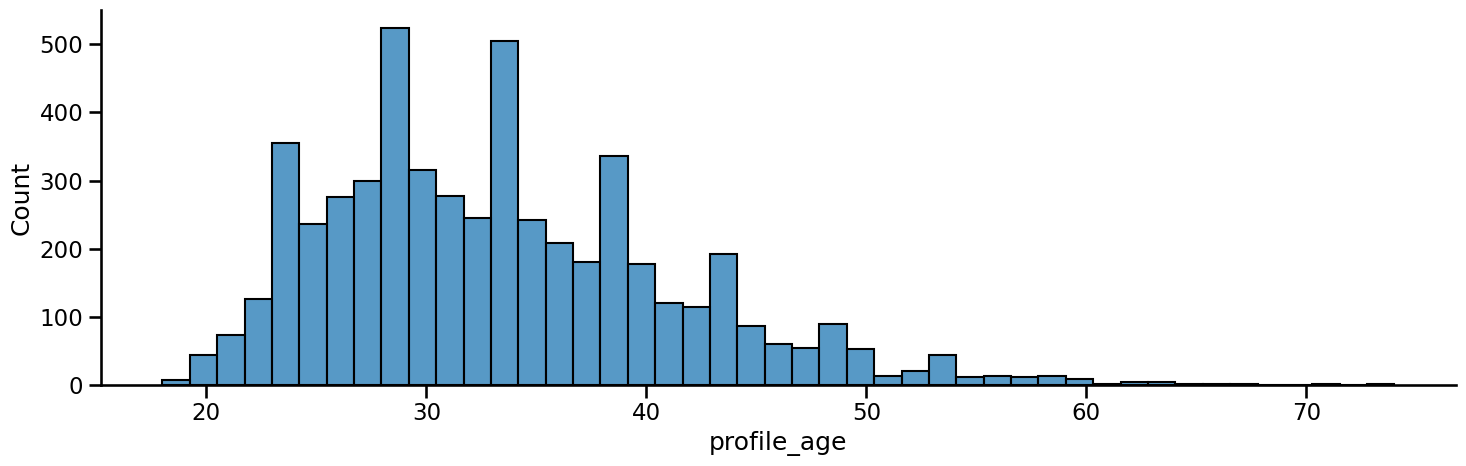

In [30]:
seaborn.displot(df.profile_age[df.profile_age < 100].dropna(),
                 stat='count', aspect=3)

Sin embargo, los histogramas pueden ocultar información. ¿Por qué? Porque agrupan rangos de valores en intervalos inferidos automáticamente. Como resultado, la visualización varía con distintas longitudes de segmentos. Comparemos los siguientes histogramas.

c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

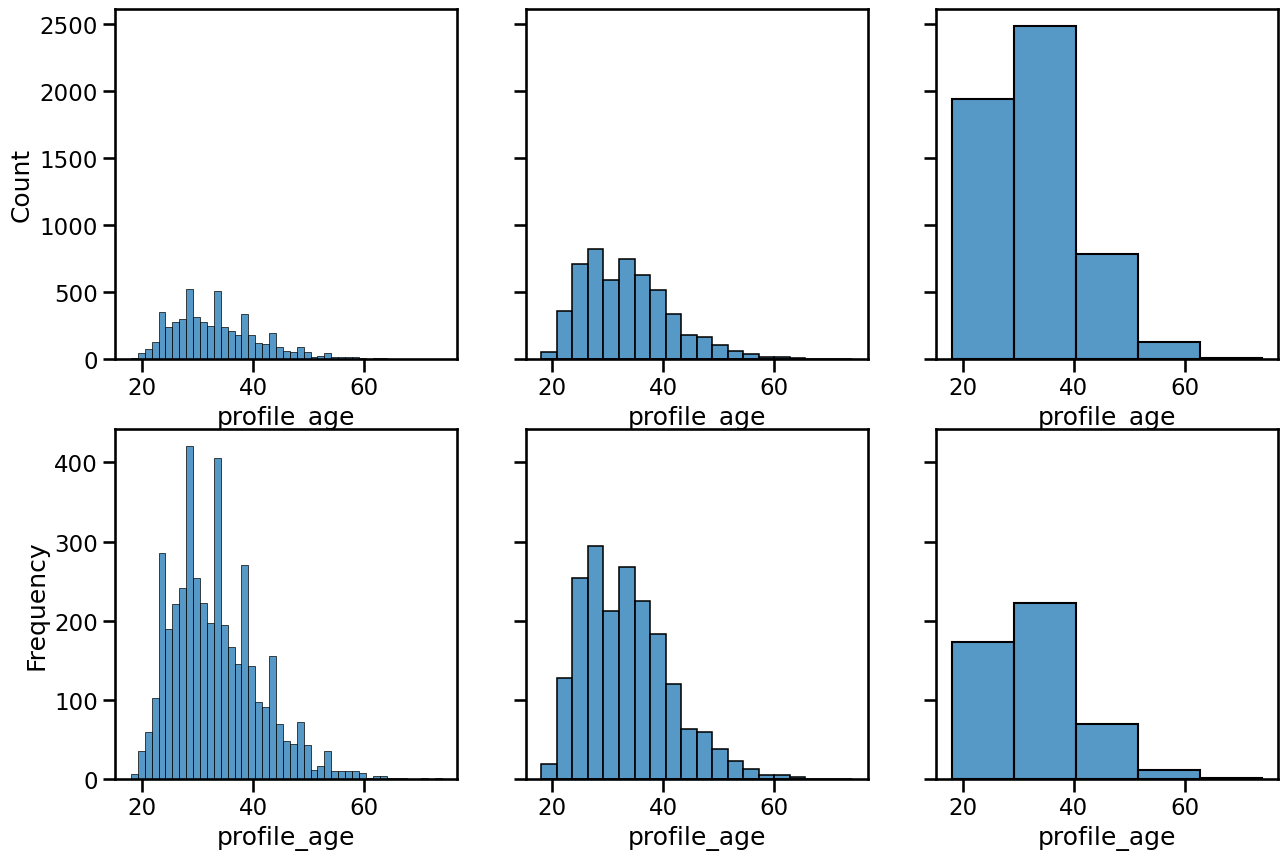

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), sharey='row')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,0],
                 stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,1],
                 bins=20, stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,2],
                 bins=5, stat='count')

seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,0],
                 stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,1],
                 bins=20, stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,2],
                 bins=5, stat='frequency')

fig.show()

Para variables discretas puede usarse un gráfico de línea, que permite visualizar el conteo de cada uno de los puntos en el rango observado.



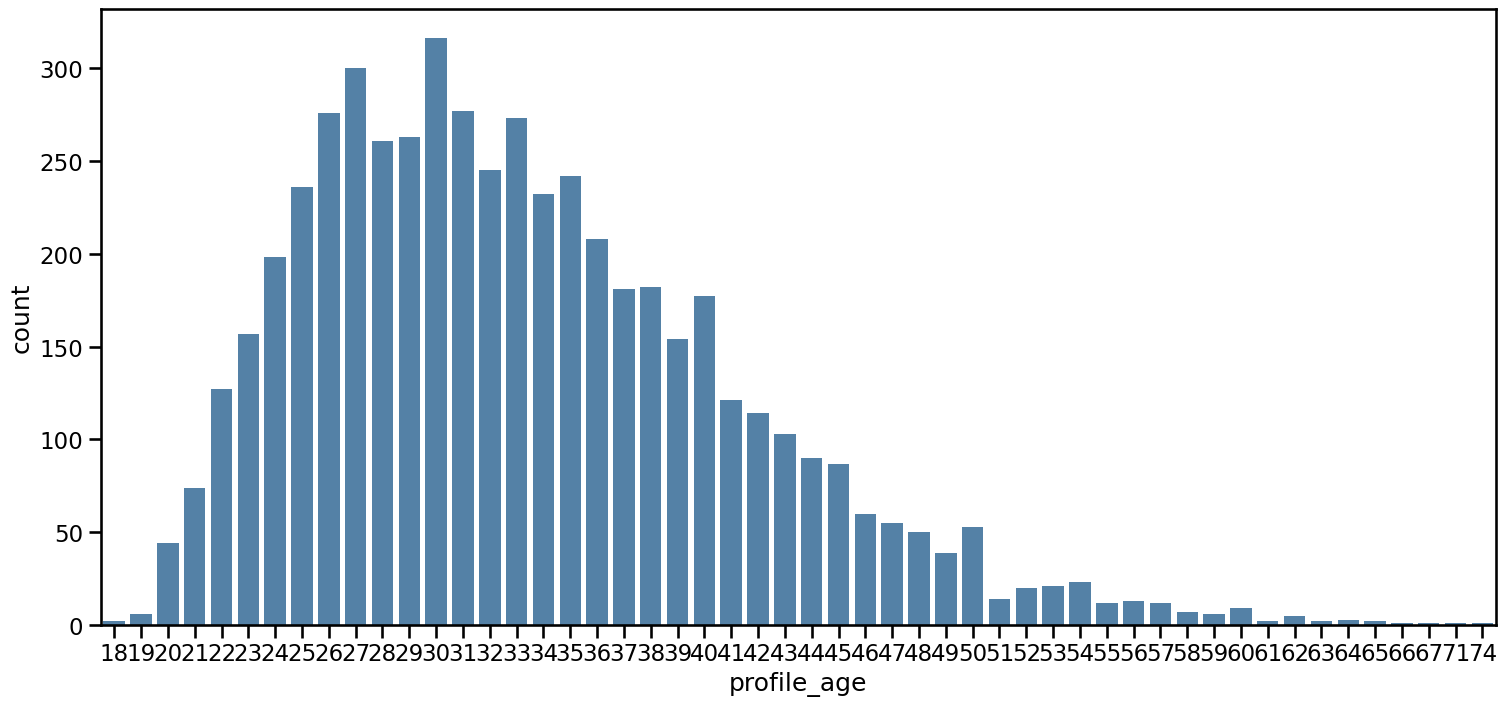

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,8))
seaborn.countplot(x=df.profile_age[df.profile_age < 100] , color='steelblue')
plt.show()

**¿Se puede usar un gráfico de líneas para la variable `salary_montly_NETO`? ¿Tiene sentido?** 

c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


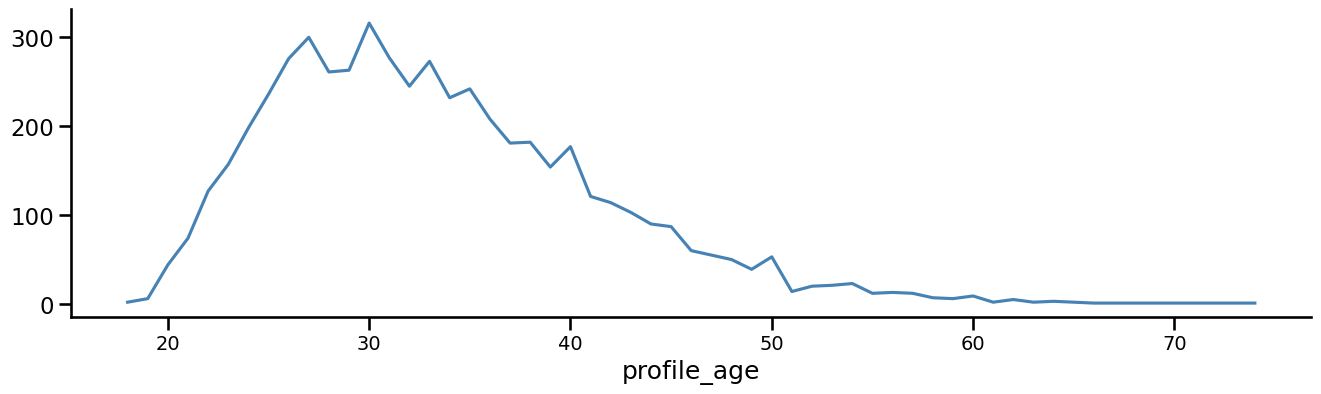

In [35]:
fig = plt.figure(figsize=(16,4))
age_counts = df[df.profile_age < 100].profile_age.value_counts()
seaborn.lineplot(x=age_counts.index,y=age_counts.values, color='steelblue')
plt.xticks(fontsize=14)
seaborn.despine()

### V.A. categóricas, para datos categóricos

Las variables categóricas toman valores de un conjunto pre-definido, usualmente pero no necesariamente finito. Para visualizarlas, puede usarse un gráfico de barras, que representa cada valor observado con una columna, y el conteo de ese valor con la altura de la columna.

Las variables numéricas discretas, ¿son categóricas?

In [36]:
df.profile_gender.unique()

array(['Varón Cis', 'Varón cis', 'Mujer Cis', 'Mujer', 'Varón Trans',
       'Queer', 'No binarie', 'Mujer cis', 'Mujer Trans', 'mujer', 'Gay',
       'Fluido', 'Bigénero', 'Femenino'], dtype=object)

In [37]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [38]:
df.profile_g.unique()

array(['Varón cis', 'Mujer cis', 'Diversidades'], dtype=object)

<Axes: xlabel='profile_g', ylabel='count'>

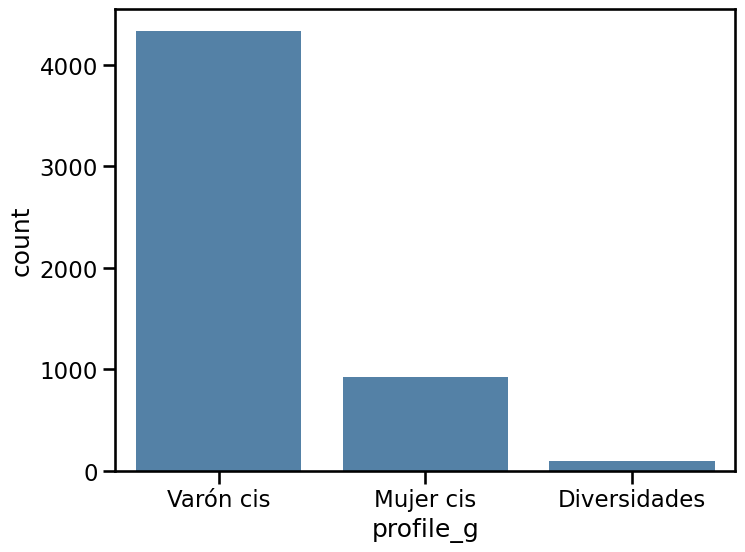

In [39]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(x=df.profile_g, color='steelblue')

Los datos categóricos pueden ser *ordinales*, si existe un orden lógico entre sus valores. 
En caso de que un orden exista, es adecuado incluirlo en el gráfico.

In [40]:
df.profile_studies_level.unique()

array(['Universitario', nan, 'Terciario', 'Secundario',
       'Posgrado/Especialización', 'Maestría', 'Doctorado',
       'Posdoctorado'], dtype=object)

In [41]:
df.profile_studies_level.nunique()

7

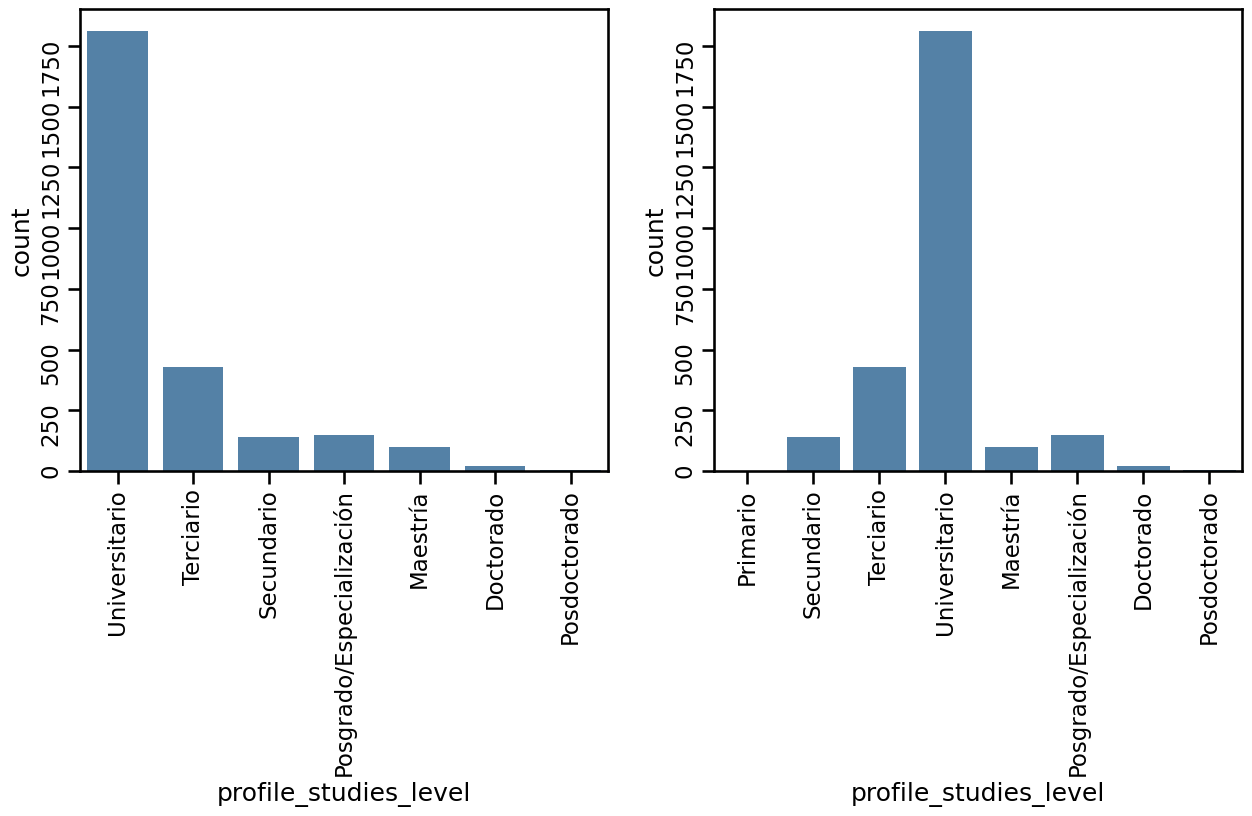

In [46]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Maestría','Posgrado/Especialización', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[0])
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=90)

### Tipos de datos vs tipos de datos

Tenemos que distinguir dos conceptos con el mismo nombre y significado similar, pero que no son iguales:
 - **tipo de datos - variable aleatoria** es el tipo de valores que venimos hablando (numérico contínuo, numérico discreto, categórico ordinal y categórico no ordinal
 - **tipo de datos (computacional)** es un concepto de programación que indica en qué formato se representa la información. Cuando asignamos a una variable `age` *del programa de Python* una realización de una variable aleatoria conceptual `profile_age`, esa variable `age` también tiene un *tipo de Python*, por ejemplo `int` o `float`.


In [47]:
age = df.profile_age.iloc[0]
type(age)

numpy.int64

*¡Importante!* Hay que tener en cuenta también los límites de la capacidad computacional al momento de representar entidades matemáticas.
* Los números reales siempre son "redondeados" a una representación racional.
* Los tipos básicos como `Int` sólo pueden representar números en un rango, por ejemplo `(-2^31, 2^31)`. Exceder el rango puede tener consecuencias inesperadas, como `integer overflow`.

¿Por qué es importante saberlo? Porque se pueden producir errores de redondeo u obtener resultados aproximados.

In [49]:
print(type(3), type(3.44), type(1/3))

import numpy
print(numpy.iinfo('int64').min, numpy.iinfo('int64').max)
numpy.int64(numpy.iinfo('int64').max) + 1

<class 'int'> <class 'float'> <class 'float'>
-9223372036854775808 9223372036854775807


C:\Users\afeli\AppData\Local\Temp\ipykernel_12416\989182016.py:5: RuntimeWarning: overflow encountered in longlong_scalars
  numpy.int64(numpy.iinfo('int64').max) + 1


-9223372036854775808

Se puede acceder a los tipos de datos del DataFrame. El tipo `object` se utiliza para representar cualquier variable que no sea numérica, como por ejemplo los `str`.

In [50]:
df.dtypes[:10]

work_country                 object
work_province                object
work_dedication              object
work_contract_type           object
salary_monthly_BRUTO        float64
salary_monthly_NETO         float64
numero                         bool
salary_in_usd                object
salary_last_dollar_value     object
salary_pay_cripto            object
dtype: object

Hay que tener en cuenta que las librerías de gráficos nos permitirán crear las visualizaciones que querramos, mientras los tipos de datos sean los adecuados.

Por ejemplo, podemos hacer un histograma con la variable `profile_open_source_contributions` si la transformamos a tipo `bool` (que se representa internamente como un tipo entero). Sin embargo, esto no tiene ningún sentido.

In [51]:
df.loc[:,'salary_in_usd_bool'] = \
  df.salary_in_usd.replace({'Cobro todo el salario en dólares': True,'Mi sueldo está dolarizado (pero cobro en moneda local)': True,'Cobro parte del salario en dólares': True}).fillna(False)
print(df.salary_in_usd.unique(), df.salary_in_usd_bool.unique())

[nan 'Cobro todo el salario en dólares'
 'Cobro parte del salario en dólares'
 'Mi sueldo está dolarizado (pero cobro en moneda local)'] [False  True]


c:\Users\afeli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='salary_in_usd_bool', ylabel='Count'>

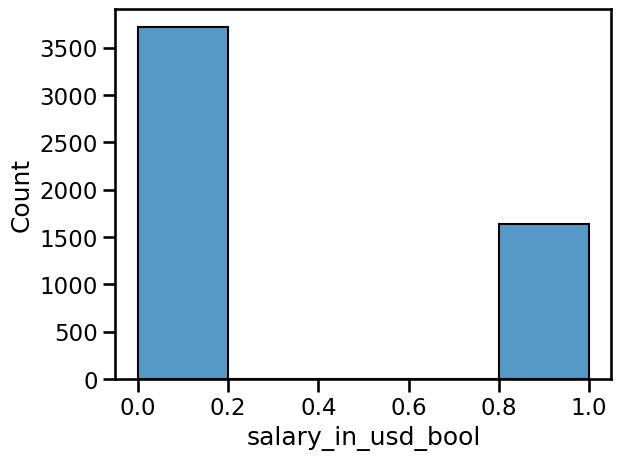

In [52]:
seaborn.histplot(df.salary_in_usd_bool, bins=5)

# Análisis del impacto de los años de experiencia

Ahora que ya sabemos aproximadamente la forma de nuestros datos, podemos pasar a realizar otra pregunta (otra iteración del proceso de análisis): 

**¿Tener más años de experiencia significa que se cobra más?**

Para responder a esta pregunta, analizamos la probabilidad de que un programador tenga un salario mensual mayor que el promedio, cuando tiene una experiencia mayor que 5 años.



## Medida de probabilidad

En el teórico vimos que si cada una de nuestros eventos es independiente e idénticamente distribuido, es decir, que $P(\{\omega_i\})=1/k$, entonces la probabilidad de un conjunto $A \subset \Omega$ es la proporción de $A$, donde .


$$P(\{\omega_i\})=1/k \implies P(A)=|A|/|\Omega|=|A|/k$$


En este problema en particular, $\Omega$ son todas las respuestas del dataset, cada $a_i$ es una variable que representa una respuesta, y el conjunto $A$ son las respuestas (filas) en la que la columna `salary_col` tiene un valor mayor que el promedio


In [54]:
avg_salary = df[salary_col].mean()
avg_salary

277010.78680309816

In [55]:
prob_above_avg = len(df[df[salary_col] >= avg_salary]) / len(df) 
prob_above_avg

0.28368794326241137

* ¿Por qué podemos usar la teoría de la probabilidad?
* ¿Por qué calculamos una probabilidad con esta fórmula?
* ¿Cómo podemos interpretar esta probabilidad?

## Probabilidad condicional

Ahora podemos pasar a hablar de la probabilidad condicional entre los dos eventos. La definimos como

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Esto es equivalente a:

$$P(A|B) = \frac{|A \cap B|}{|B|}$$

## Ejercicio

Responder: **¿Si uno tiene más de 5 años de experiencia, la probabilidad de cobrar más que el promedio aumenta? ¿Estos eventos, son independientes?**


In [56]:
is_above_avg = df[salary_col ]> avg_salary
exp_greater_5 = df.profile_years_experience > 5 

intersection_count = len(df[is_above_avg & exp_greater_5])
df[is_above_avg & exp_greater_5]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender,profile_g,salary_in_usd_bool
5,Argentina,Chaco,Full-Time,Staff (planta permanente),633000.0,395000.0,True,Cobro parte del salario en dólares,NaN,NaN,...,UNNE - Universidad Nacional Del Nordeste,NaN,NaN,NaN,NaN,NaN,31,Varón Cis,Varón cis,True
12,Argentina,Chaco,Full-Time,Staff (planta permanente),329850.0,315000.0,True,Cobro parte del salario en dólares,NaN,NaN,...,UTN - Universidad Tecnológica Nacional,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,45,Varón Cis,Varón cis,True
25,Argentina,Chaco,Full-Time,Freelance,300000.0,285000.0,True,NaN,NaN,NaN,...,UTN - Universidad Tecnológica Nacional,NaN,NaN,No,0.0,Neto,51,Varón Cis,Varón cis,False
36,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),450000.0,380000.0,True,Mi sueldo está dolarizado (pero cobro en moned...,128,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis,Varón cis,True
41,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),1400000.0,1400000.0,True,Cobro todo el salario en dólares,200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35,Varón cis,Varón cis,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,Argentina,Tucumán,Full-Time,Staff (planta permanente),650000.0,600000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,Varón Cis,Varón cis,False
5329,Argentina,Tucumán,Full-Time,Staff (planta permanente),700000.0,440000.0,True,NaN,NaN,NaN,...,UTN - Universidad Tecnológica Nacional,NaN,NaN,NaN,NaN,NaN,41,Varón Cis,Varón cis,False
5331,Argentina,Tucumán,Full-Time,Staff (planta permanente),396000.0,290000.0,True,NaN,NaN,NaN,...,universidad nacional de tucuman,NaN,NaN,No,0.0,Neto,36,Varón Cis,Varón cis,False
5348,Argentina,Tucumán,Full-Time,Remoto (empresa de otro país),300000.0,294000.0,True,Cobro todo el salario en dólares,NaN,NaN,...,UNT - Universidad Nacion de Tucuman,NaN,NaN,No,0.0,Porcentaje de mi sueldo bruto,30,Varón cis,Varón cis,True


In [57]:
p_condic_above_avg = len(df[is_above_avg & exp_greater_5])/len(df[exp_greater_5])
print(p_condic_above_avg)
print(prob_above_avg)

0.429225645295587
0.28368794326241137


Respuesta:
No son independientes , no son iguales P(A|B) y P(A)...

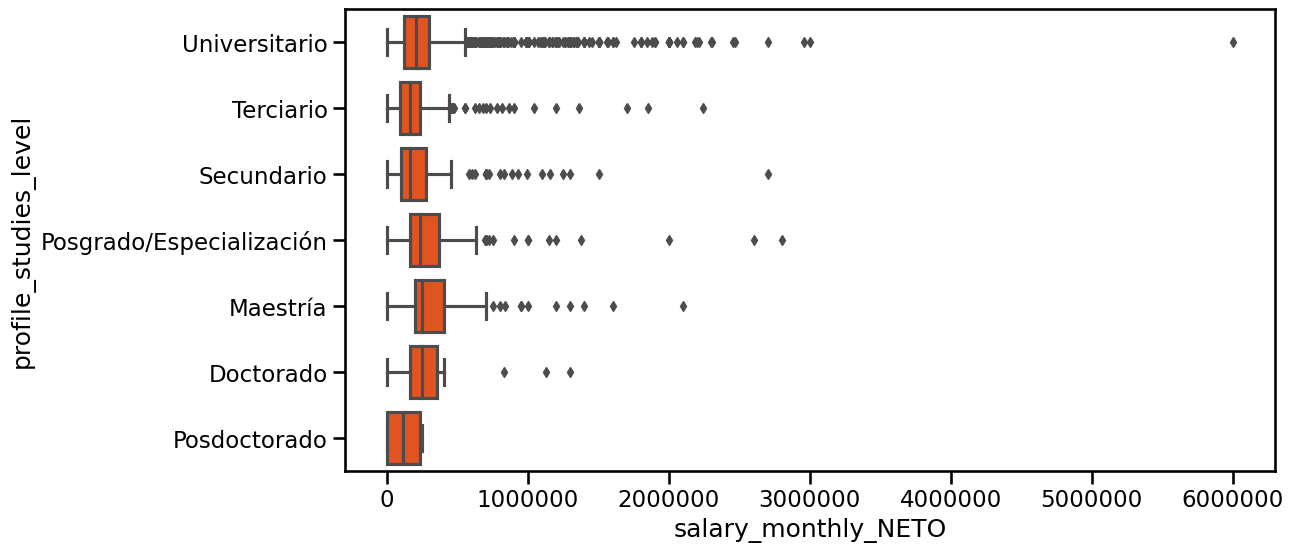

In [58]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')